In some recent modeling work:

>    Laurent Perrinet, Guillaume S. Masson. Motion-based prediction is sufficient to solve the aperture problem. Neural Computation, 24(10):2726--50, 2012 https://laurentperrinet.github.io/publication/perrinet-12-pred

we study the role of transport in modifying our perception of motion. Here, we test what happens when we change the amount of noise in the stimulus.

In this script the predictive coding is done using the ``MotionParticles`` package and for a [motion texture](https://neuralensemble.github.io/MotionClouds/) within a disk aperture.

<!-- TEASER_END -->


Let's first initialize the notebook:

In [1]:
from __future__ import division, print_function
import numpy as np
import os
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=6, suppress=True)
from IPython.display import display, HTML
def show_video(filename): 
    return HTML(data='<video src="{}" loop autoplay width="600" height="600"></video>'.format(filename))
%load_ext autoreload
%autoreload 2


## creating the stimulus




In [4]:
import MotionParticles as mp

figpath = mp.figpath = '../files/2017-12-21-MotionVariability/'
matpath = mp.matpath = '/tmp/'
try: 
    os.mkdir(figpath)
except:
    pass

ds = 1
N_X, N_Y, N_frame = mp.N_X//ds, mp.N_Y//ds, mp.N_frame
V_X = 1.

dot_size = 3.75
stim_start = .25
stim_stop = .75
im_noise = .05


opts = dict(X_0=0., Y_0=0, V_X=V_X, V_Y=0, texture_V_X=V_X, texture_V_Y=0, dot_size=dot_size,
                stim_duration=stim_stop-stim_start, stim_start=stim_start,
                width=mp.width, im_noise=im_noise, im_contrast=1.,
                hard=True, texture=True, sf_0=0.2, B_sf=.05, B_theta=np.inf,
                pink_noise=True, latency = 0, v_init = 20)
            
            
image = {}
experiment = 'MotionVariability'

image['im'] = mp.generate(N_X=N_X, N_Y=N_Y, N_frame=N_frame, **opts, B_V=.5)
mp.anim_save(image['im'], os.path.join(figpath, experiment + '-anim'))

Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-anim.mp4


/usr/local/lib/python3.6/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


In [5]:
show_video(os.path.join(figpath, experiment + '-anim' + mp.vext))

## predictive coding

We now use this image and look at what happens when running the algorithm decribed in:


> Laurent Perrinet, Guillaume S. Masson. Motion-based prediction is sufficient to solve the aperture problem. Neural Computation, 24(10):2726--50, 2012 https://laurentperrinet.github.io/publication/perrinet-12-pred


This uses the ``MotionParticles`` package available upon request (meaning, there are bits of code that need some clean-up...). Note here that we also look at what happens when modifying latencies - but we will see this does not change results.

In [6]:
print('range=', np.logspace(-6, .0, 7, base=2))

range= [0.015625 0.03125  0.0625   0.125    0.25     0.5      1.      ]


In [7]:
mp.v_init

3.0

In [8]:
N_variable = 7
B_Vs = np.logspace(-6., 0., N_variable, base=2)

image = {}
for label, D_x, D_V in zip(['PBP', 'MBP'], [3.*mp.D_x, .3*mp.D_x], [.1*mp.D_V, .5*mp.D_V]):
    figname = os.path.join(mp.figpath, experiment + '-' + label)
            
    image[label] = {}
    opts_ = opts.copy()
    opts_.update(D_x=D_x, D_V=D_V)
    _  = mp.figure_image_variable(
            figname, 
            N_X, N_Y, N_frame, mp.generate, order=None,
            do_figure=False, do_video=True, N_quant_X=50, N_quant_Y=50, fixed_args=opts_,
            B_V=B_Vs)
    try:
        for B_V in B_Vs:
            matname = mp.make_figname(figname, {'B_V': B_V}).replace(mp.figpath, mp.matpath) + '.npy'
            image[label][B_V] = np.load(matname)
    except:
        print('no result yet for ', matname)

Studying CONDENSATION by changing image along variable(s) : {'B_V': array([0.015625, 0.03125 , 0.0625  , 0.125   , 0.25    , 0.5     ,
       1.      ])}
Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_0156_spatial_readout.mp4
Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_0156_particles.mp4


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_0312_spatial_readout.mp4
Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_0312_particles.mp4
Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_0625_spatial_readout.mp4
Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_0625_particles.mp4
Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_1250_spatial_readout.mp4
Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_1250_particles.mp4
Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_2500_spatial_readout.mp4
Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_2500_particles.mp4
Saving sequence ../files/2017-12-21-MotionVariability/MotionVariability-PBP-B_V_0_5000_spatial_readout.mp4
Saving sequence ../files/2017-12-21-MotionVariability/MotionV

## analyzing results:

Averaged over the 20 trials of the simulations. we show here the histogram of the particles representing motion: it represents the posterior distribution of the model. At each pixel, value gives the strength of the probability and hue gives the direction (in short, as in the above paper but with a black background for zero probability).

In [10]:
show_video(os.path.join(figpath, experiment + '-PBP-B_V_0_1250_spatial_readout' + mp.vext))

In [18]:
show_video(os.path.join(figpath, experiment + '-MBP-B_V_0_1250_spatial_readout' + mp.vext))

The posterior thus follows the motion and quickly converges to the physical motion ($V_X=1$ to $V_X=-1$d). Note that in this motion-based predictive scheme, motion is better tracked along coherent trajectories and that it is "dragged" in its direction  : the bias is aperture-outward.

## x-t histograms of the results

This is confirmed by showing the histogram of detected positions for the stimulus:

In [13]:
v_hist = {}
N_quant = 50
label = 'PBP'
time = np.linspace(0, 1, N_frame)
particles = image[label][0.5].copy()
v_hist, x_edges, y_edges = mp.spatial_readout(particles, N_quant_X=N_quant, N_quant_Y=1, display=False)
v_hist /= np.sum(v_hist, axis=0)

In [14]:
_, x_edges, y_edges = mp.spatial_readout(particles, N_quant_X=N_quant, N_quant_Y=N_quant, display=False)
x_middle = .5*(x_edges[1:] + x_edges[:-1])
print('Position of the middle of the bins =', x_middle)
y_middle = .5*(y_edges[1:] + y_edges[:-1])

Position of the middle of the bins = [-0.98 -0.94 -0.9  -0.86 -0.82 -0.78 -0.74 -0.7  -0.66 -0.62 -0.58 -0.54
 -0.5  -0.46 -0.42 -0.38 -0.34 -0.3  -0.26 -0.22 -0.18 -0.14 -0.1  -0.06
 -0.02  0.02  0.06  0.1   0.14  0.18  0.22  0.26  0.3   0.34  0.38  0.42
  0.46  0.5   0.54  0.58  0.62  0.66  0.7   0.74  0.78  0.82  0.86  0.9
  0.94  0.98]


label= PBP
------->  0.015625 <------------


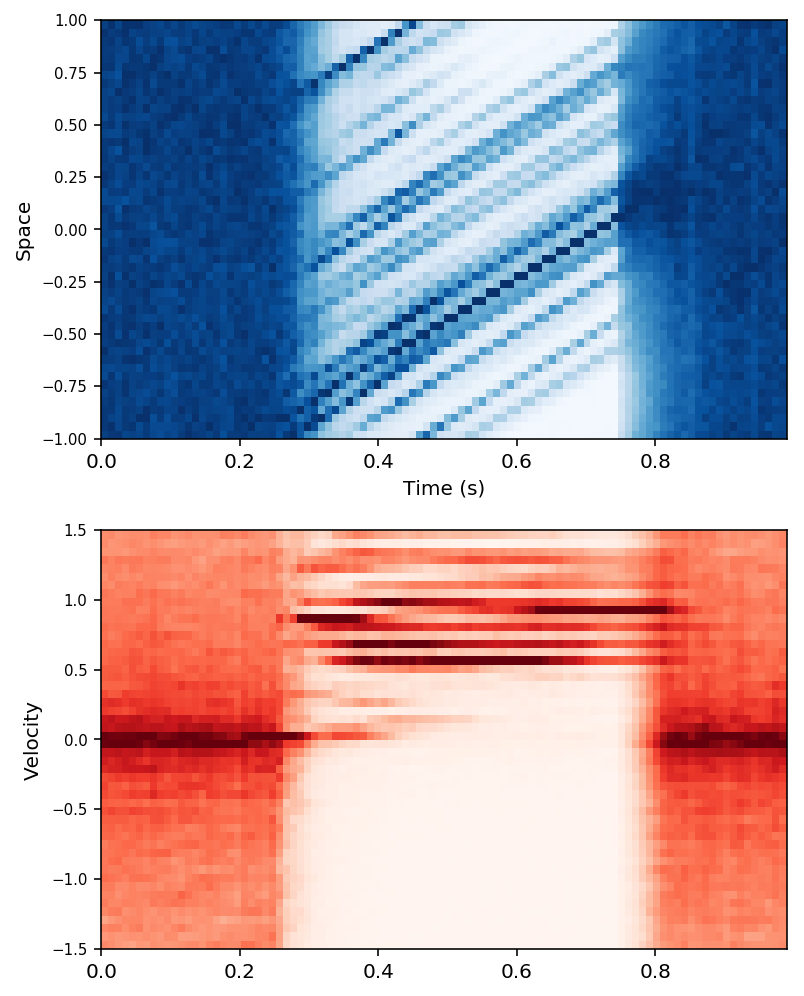

------->  0.03125 <------------


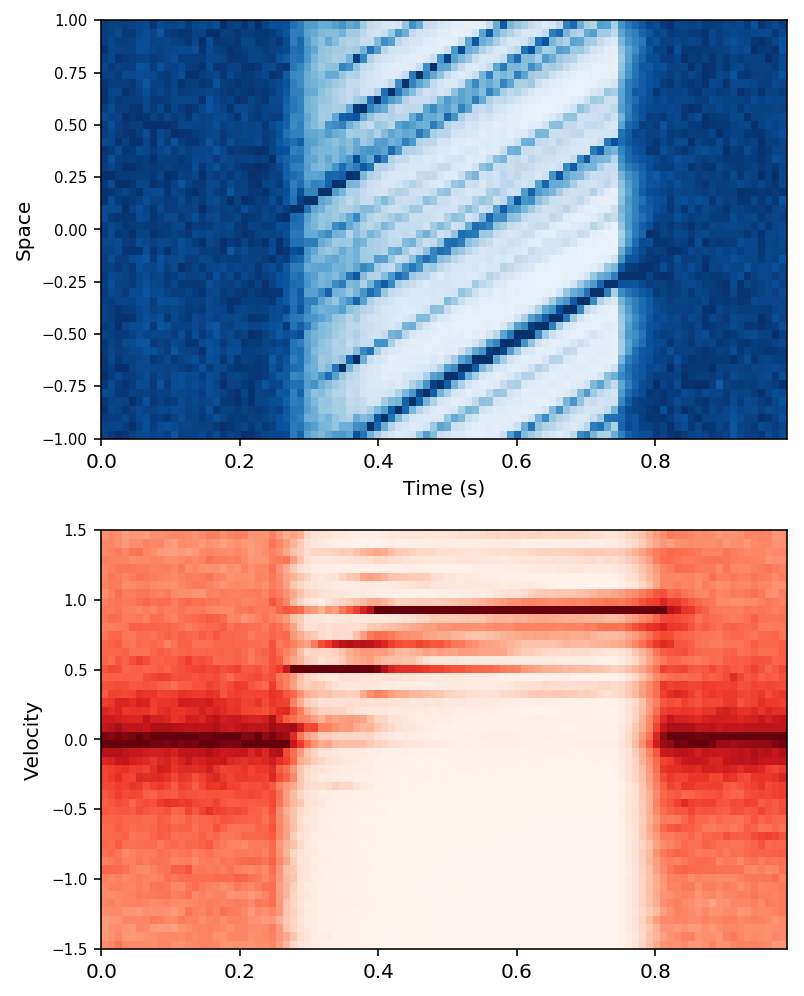

------->  0.0625 <------------


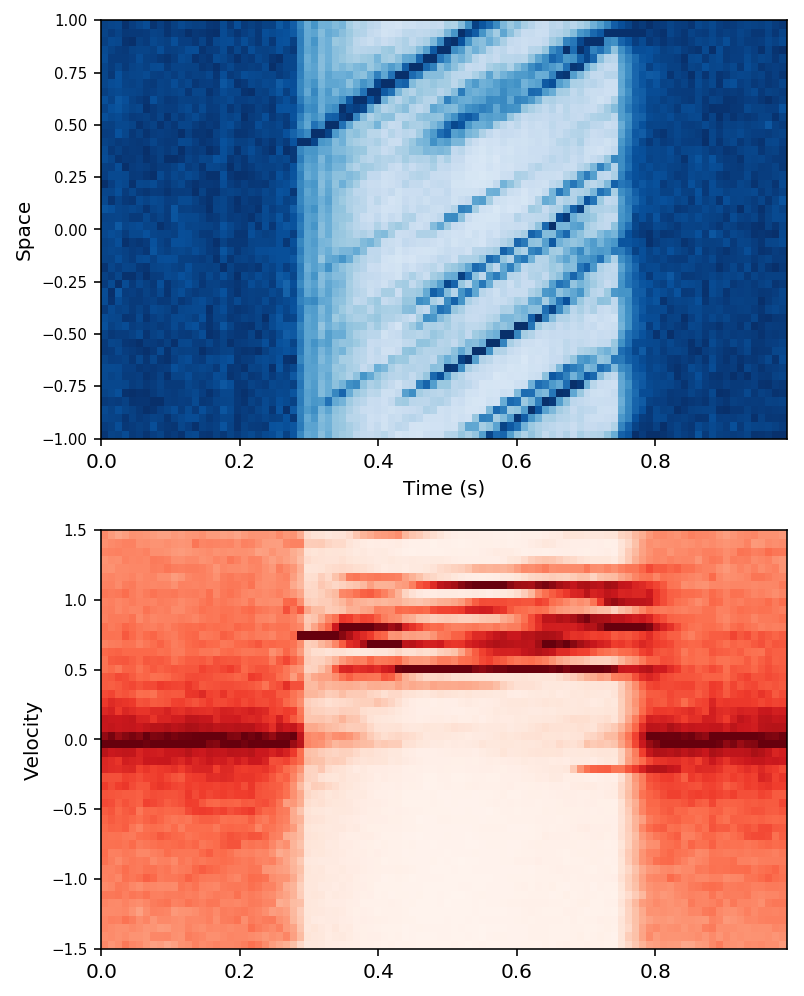

------->  0.125 <------------


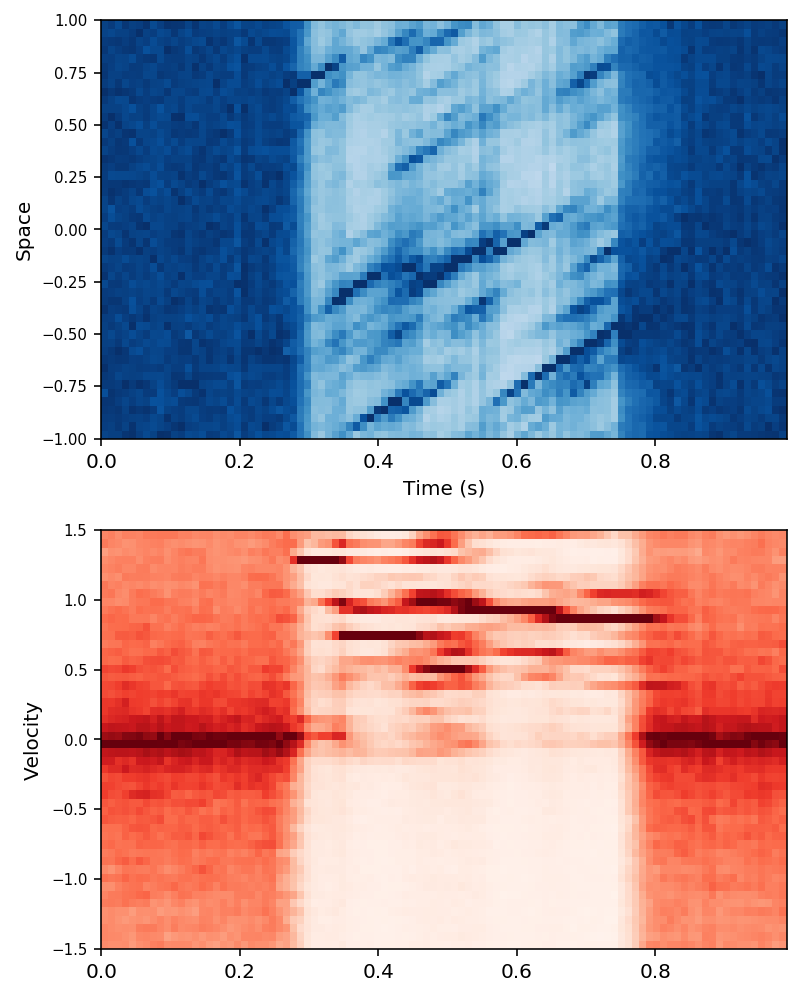

------->  0.25 <------------


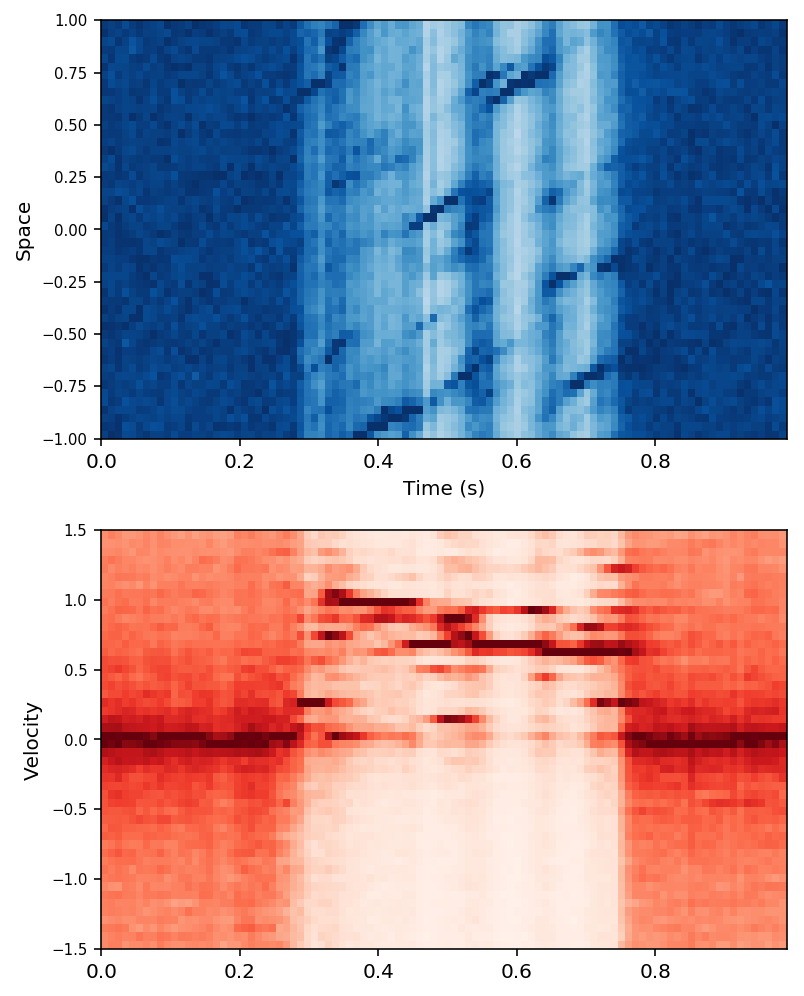

------->  0.5 <------------


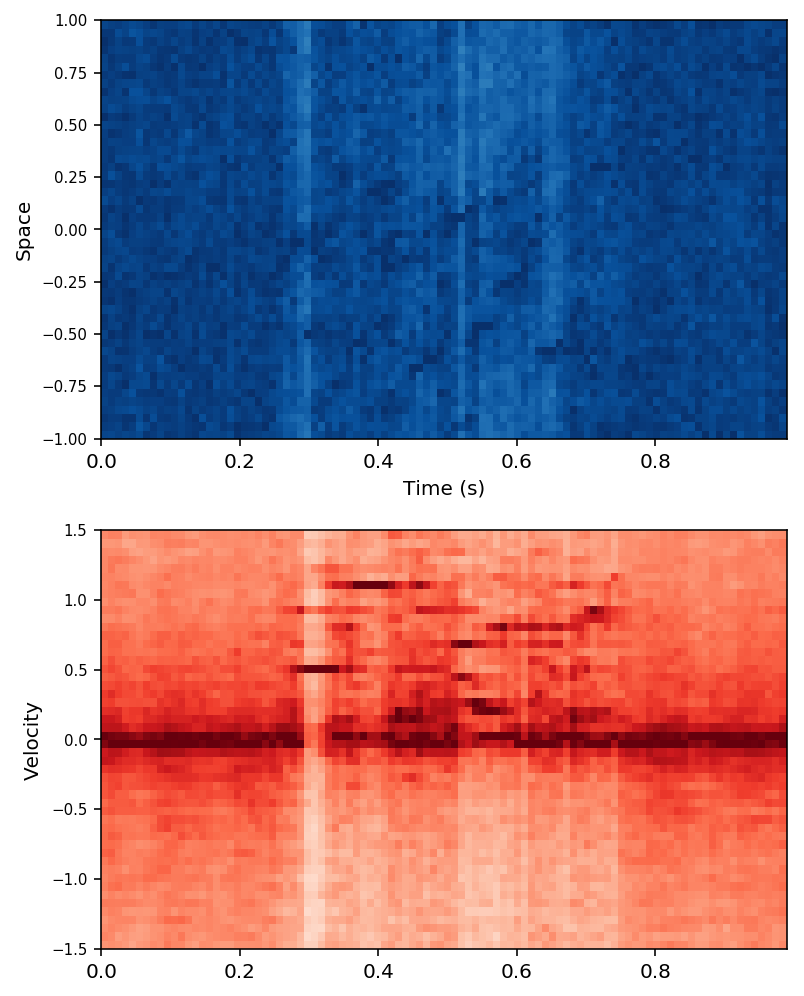

------->  1.0 <------------


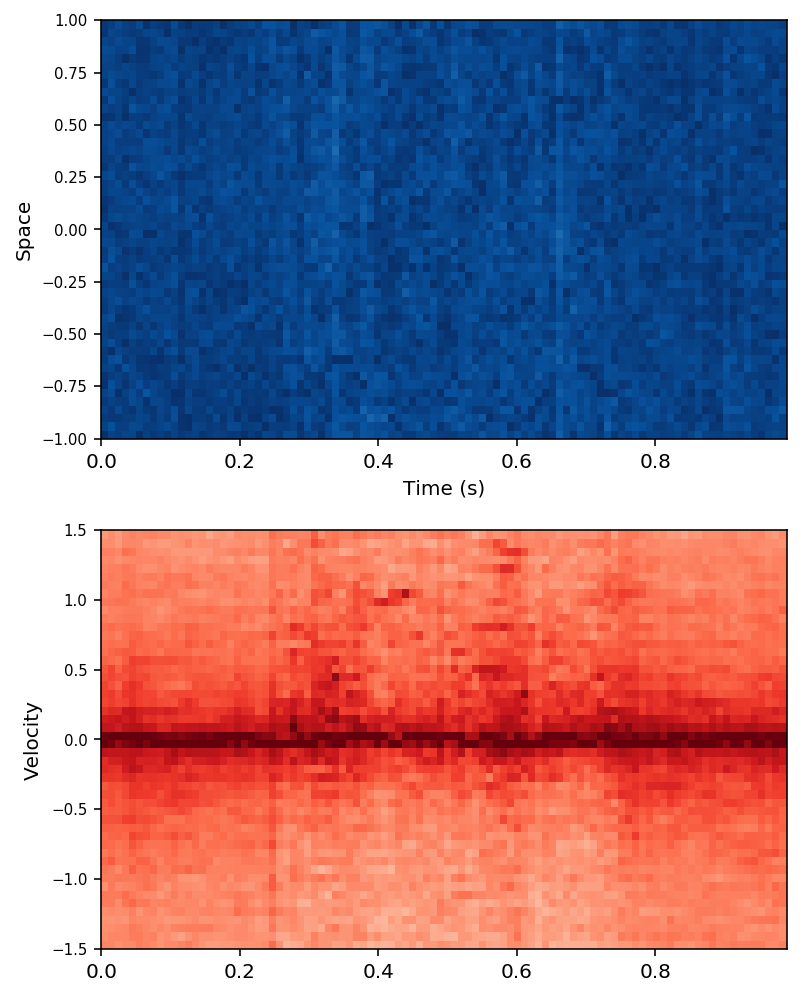

label= MBP
------->  0.015625 <------------


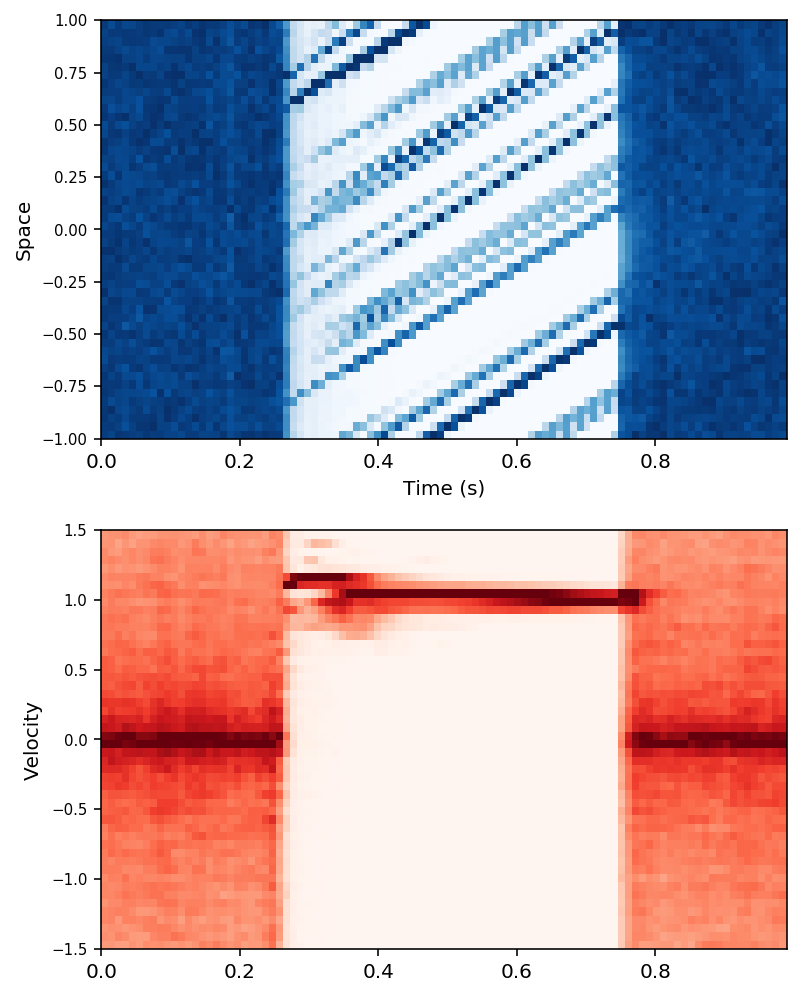

------->  0.03125 <------------


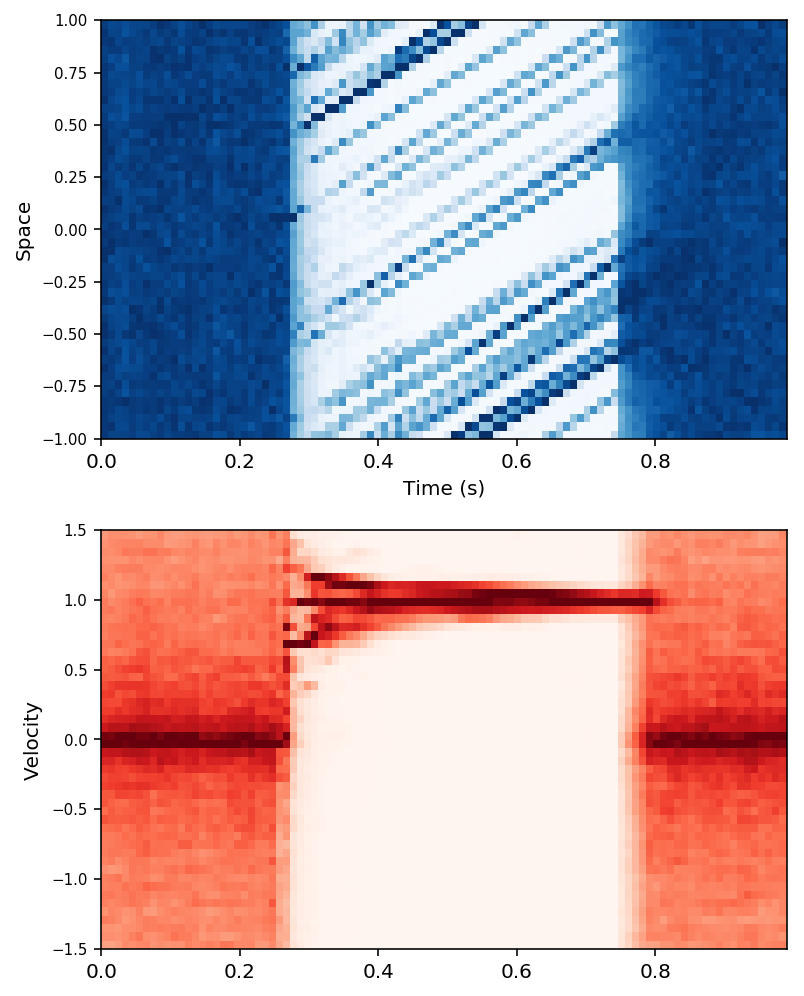

------->  0.0625 <------------


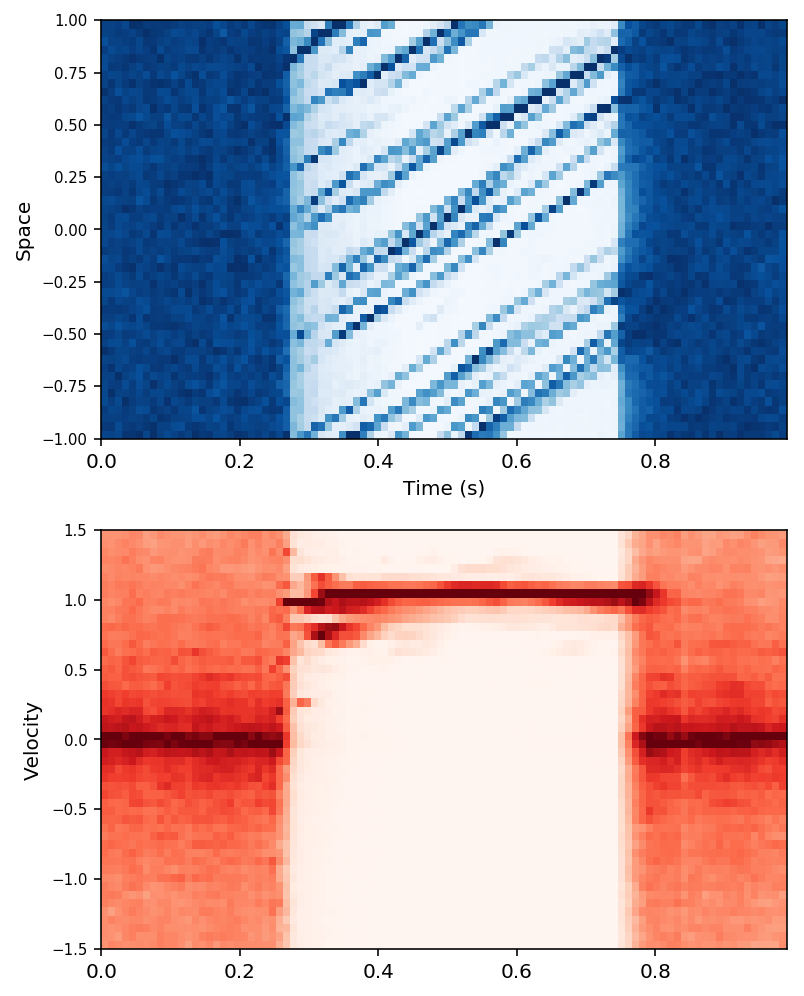

------->  0.125 <------------


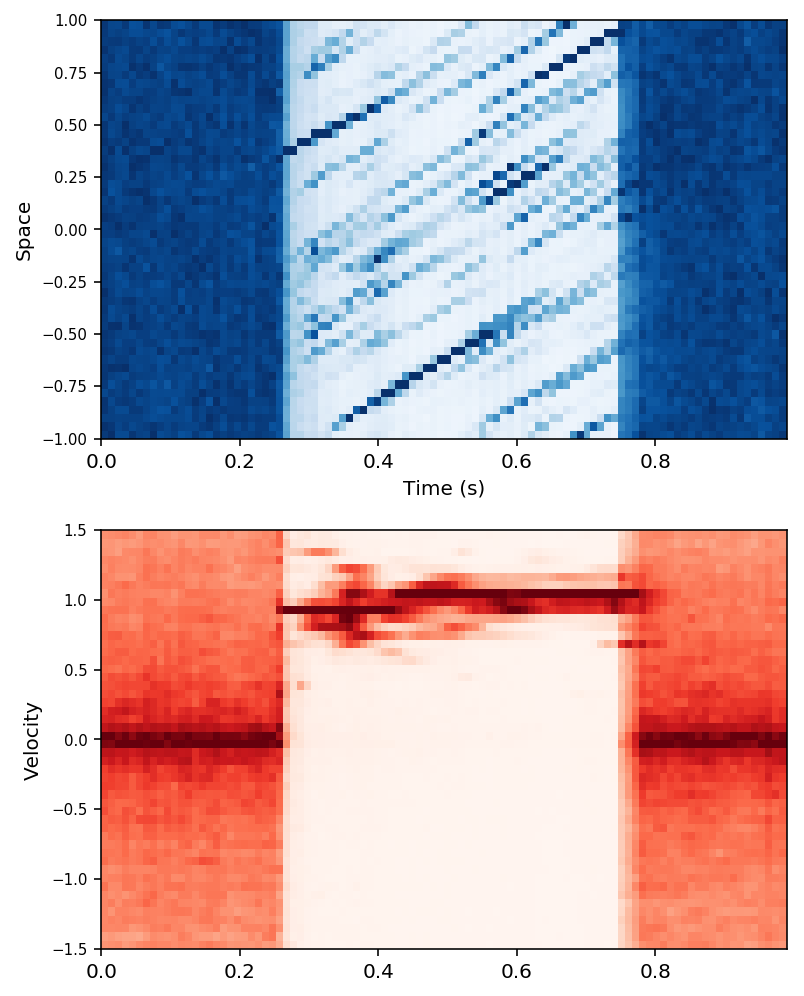

------->  0.25 <------------


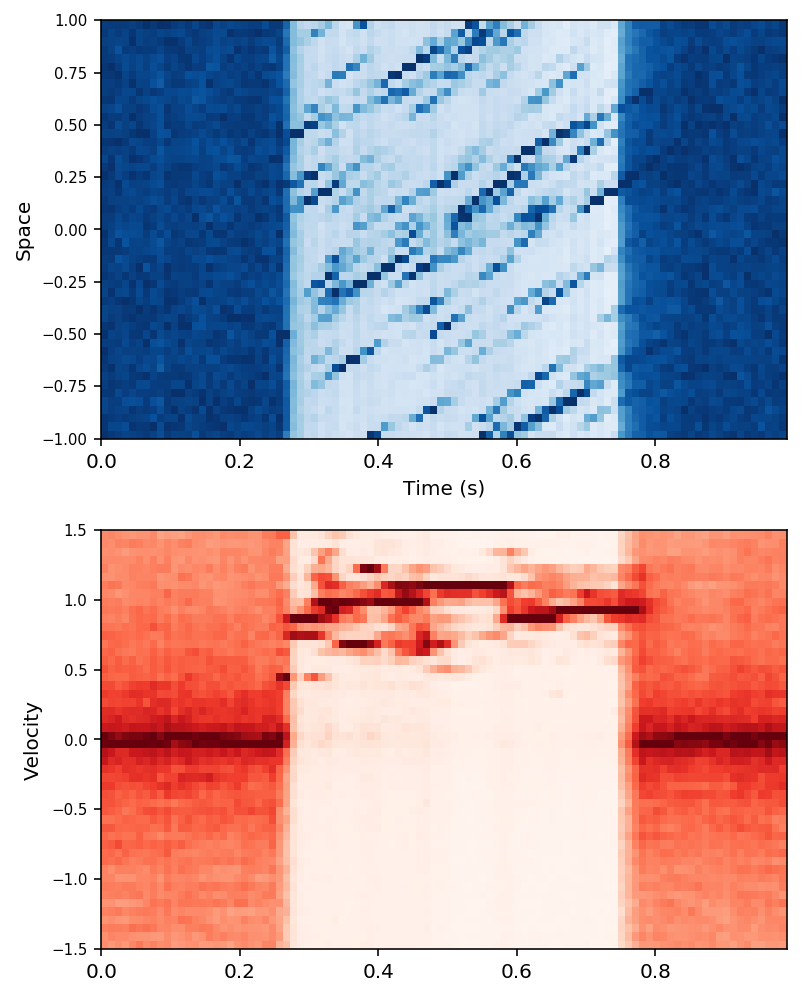

------->  0.5 <------------


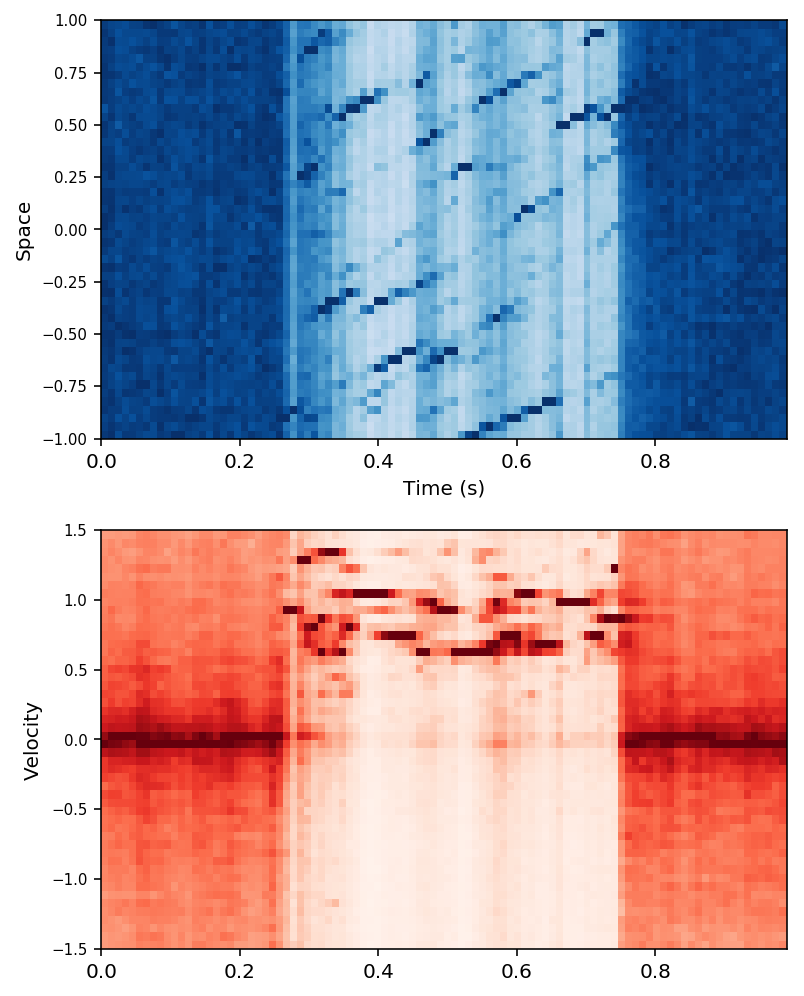

------->  1.0 <------------


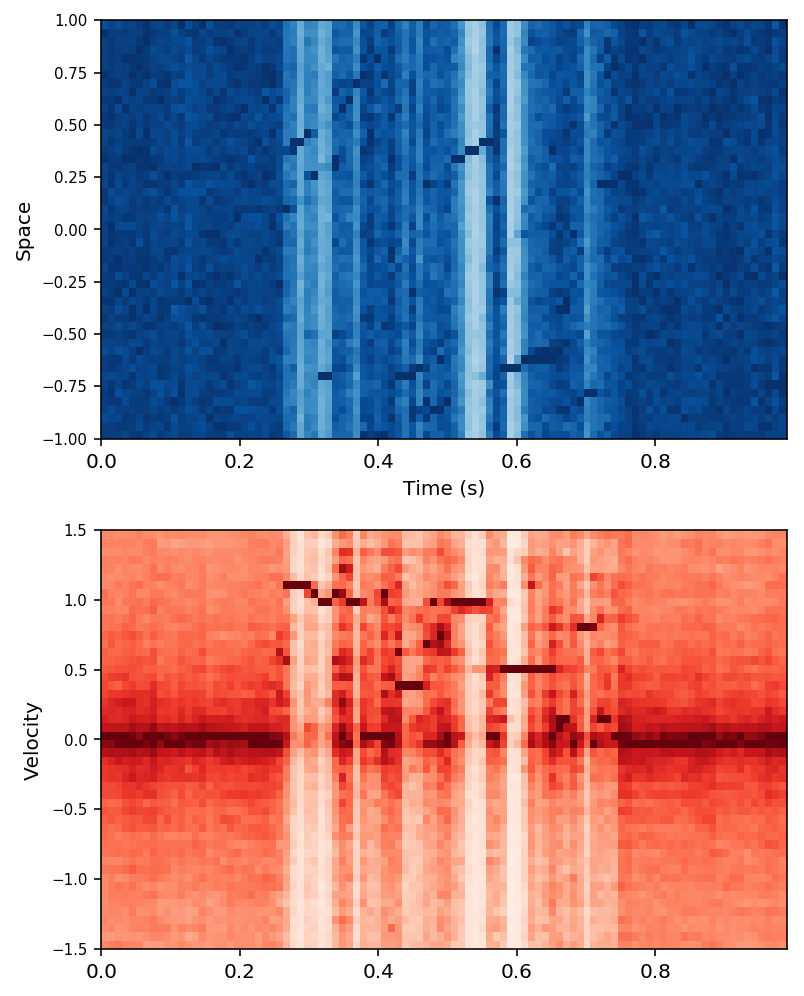

In [15]:
for label in ['PBP', 'MBP']:
    print('label=', label)
    for i_variable, B_V in enumerate(B_Vs):
        print('-------> ', B_V, '<------------')
        particles = image[label][B_V].copy()    
        fig, axs = mp.spatial_readout(particles, N_quant_X=N_quant, N_quant_Y=1, ruler=False)
        average_pos = np.sum(v_hist*x_middle[:, np.newaxis], axis=0)
        #_ = axs[0].plot(time, average_pos, lw=4, ls='--')
        #_ = axs[0].plot([0, 1], [dot_size, dot_size], c='orange', lw=4, ls='--')
        #_ = axs[0].plot([0, 1], [-dot_size, -dot_size], c='orange', lw=4, ls='--')
        plt.show()

The posterior thus follows the motion and quickly converges to the physical motion ($V_X=1$ to $V_X=-1$d). Note that in this motion-based predictive scheme, motion is better tracked along coherent trajectories and that it is "dragged" in its direction  : the bias is aperture-outward.

## x-t histograms of the results

This is confirmed by showing the histogram of detected positions for the stimulus:

label = PBP
i_variable, B_V = 0 0.015625
i_variable, B_V = 1 0.03125
i_variable, B_V = 2 0.0625
i_variable, B_V = 3 0.125
i_variable, B_V = 4 0.25
i_variable, B_V = 5 0.5
i_variable, B_V = 6 1.0
['0.016', '0.031', '0.062', '0.125', '0.250', '0.500', '1.000']


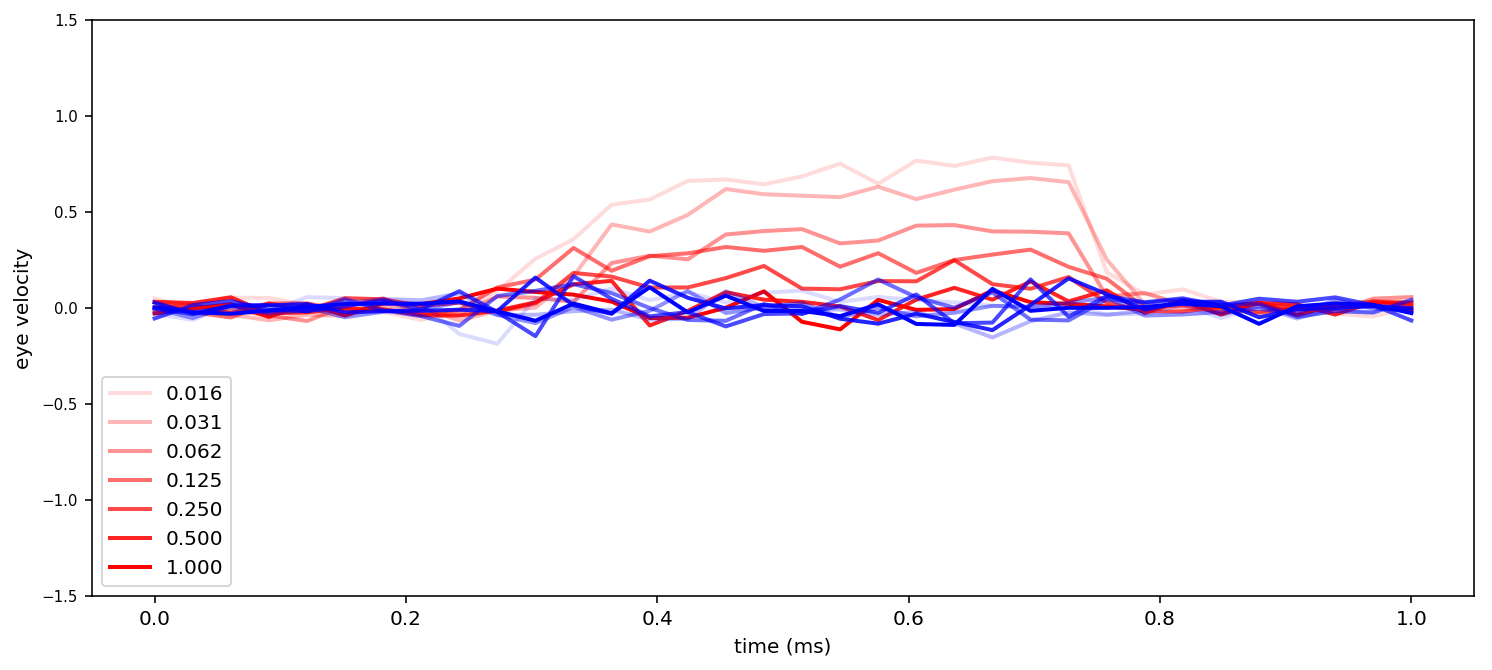

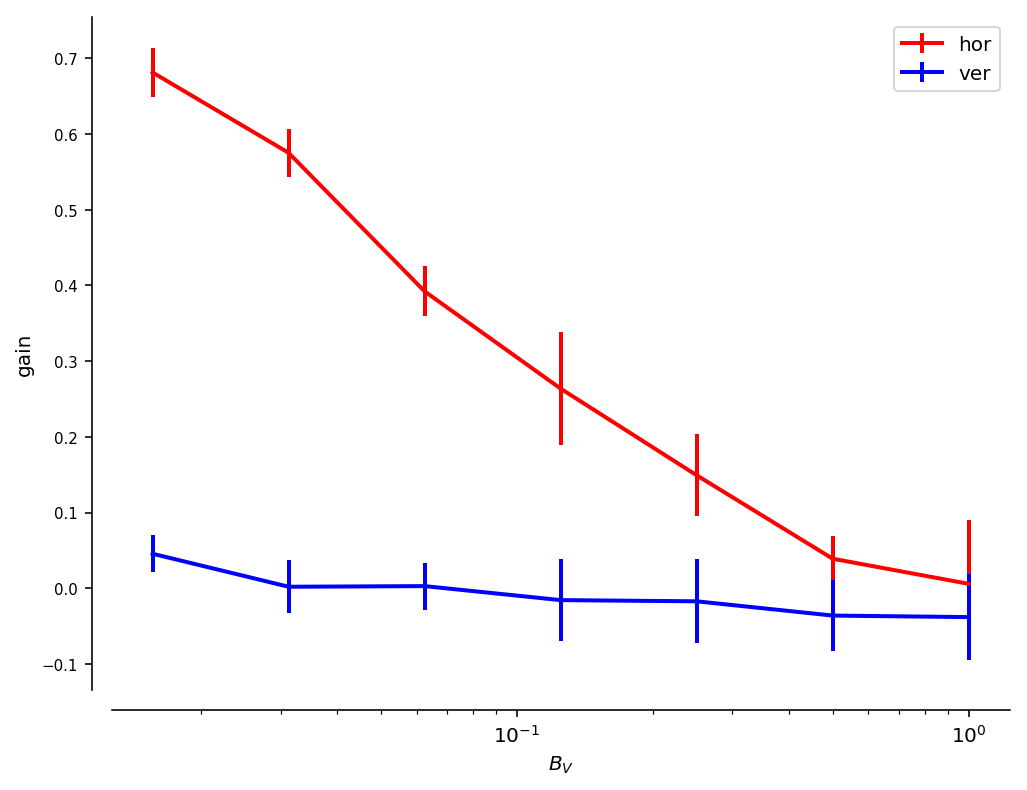

label = MBP
i_variable, B_V = 0 0.015625
i_variable, B_V = 1 0.03125
i_variable, B_V = 2 0.0625
i_variable, B_V = 3 0.125
i_variable, B_V = 4 0.25
i_variable, B_V = 5 0.5
i_variable, B_V = 6 1.0
['0.016', '0.031', '0.062', '0.125', '0.250', '0.500', '1.000']


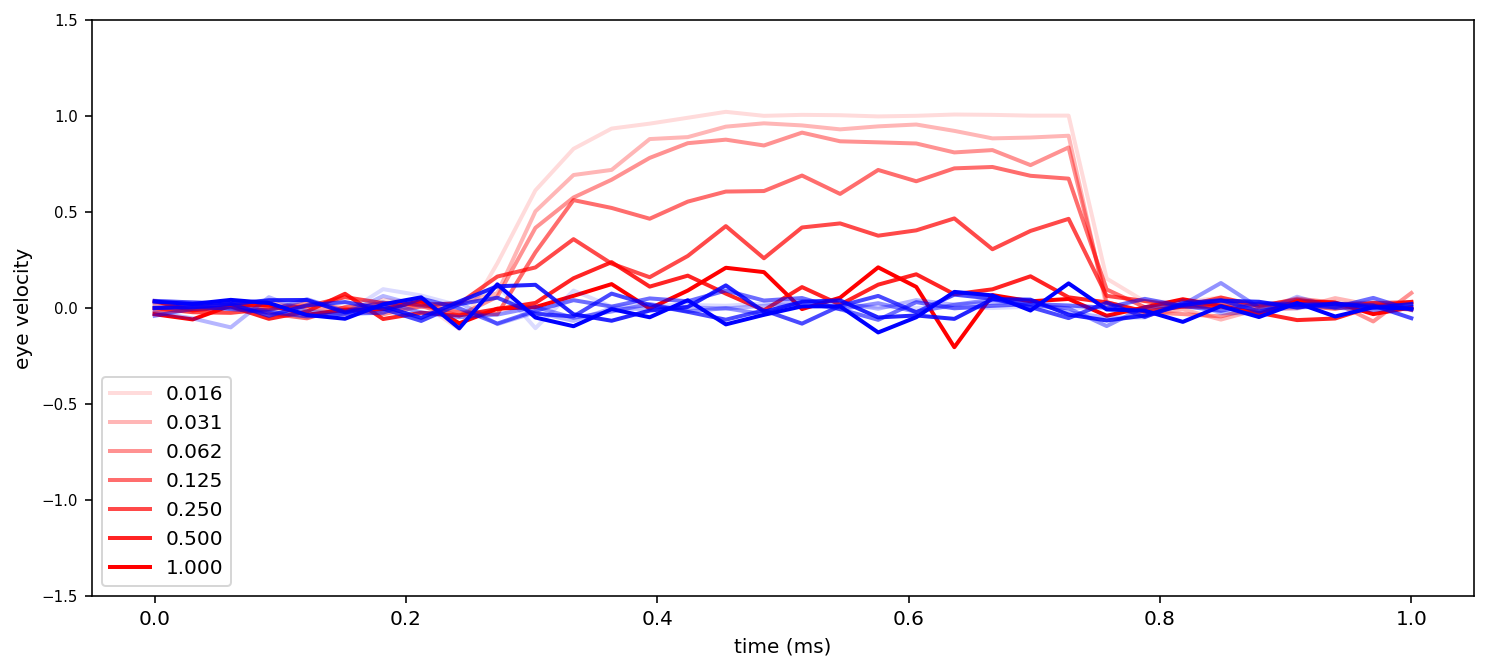

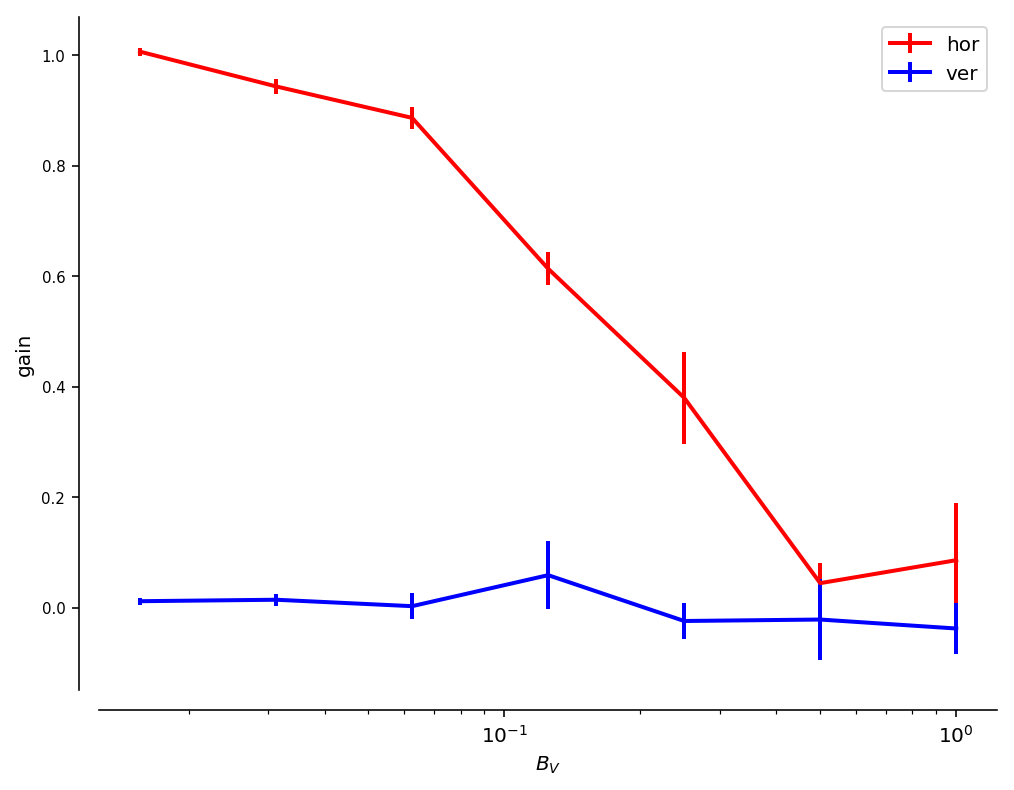

In [17]:
latency = 0
N_trials = mp.N_trials
N_particles = mp.N_particles
for label in ['PBP', 'MBP']:
    print('label =', label)
    result = np.zeros((2, N_variable, N_trials, int(N_frame)))
    labels = []    
    for i_variable, B_V in enumerate(B_Vs):
        print('i_variable, B_V =', i_variable, B_V)
        #matname = mp.make_figname(figname, {'B_V': B_V}).replace(mp.figpath, mp.matpath) + '.npy'
        p_ = image[label][B_V]
        for i_trial in range(N_trials):
            e_h, e_v, v_h, v_v, a_h, a_v = mp.OM(p_[:, int(i_trial*N_particles):int((i_trial+1)*N_particles), :], display=False)
            result[0, i_variable, i_trial, :] = e_h
            result[1, i_variable, i_trial, :] = e_v
        labels.append('%.3f' % B_V)

    print(labels)

    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_axes((0.15, 0.1, .8, .8))
    N_quant_T = 32
    step = int(N_frame/N_quant_T)
    time = np.linspace(0., 1, int(N_frame))
    lines = ax.plot(time[::step], result[0, :, :, ::step].mean(axis=1).T, lw=2, c='r')
    for i_line, line in enumerate(lines):
        line.set_alpha(float(i_line+1)/len(lines))#
        line.set_label(labels[i_line])
    lines = ax.plot(time[::step], result[1, :, :, ::step].mean(axis=1).T, lw=2, c='b')
    for i_line, line in enumerate(lines):
        line.set_alpha(float(i_line+1)/len(lines))# [i_line])#set_marker(linestyle[i_line])
    #adjust_spines(ax, ['left', 'bottom'])
    ax.set_xlabel('time (ms)')
    ax.set_ylabel('eye velocity')
    ax.set_ylim([-1.5, 1.5])
    ax.legend(loc='lower left');
    plt.show()

    fig, ax = mp.PRF(B_Vs, result[:, :, :, (N_frame//2+latency-5):(N_frame//2+latency+5)].mean(axis=2), r'$B_V$')
    #ax.set_ylim([-1.5, 1.5])
    #ax.set_xticks(range(len(labels)))
    #ax.set_xticklabels(labels)
    plt.show()